In [1]:
import csv
import nltk
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import string
from collections import Counter
from nltk.corpus import stopwords
nltk.download('stopwords')

%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wills\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#creates a stop words variable to ignore when processing the data
stop_words = stopwords.words('english')

# Show stop words
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

In [3]:
#Open .txt file with review data inside
with open('C:/Users/wills/Desktop/HB Data/MIDTOWN2018AUG6THMTHSRVW1STAR.txt','r') as test:
    data = test.read().lower()
print(data)

review
 hot inside and a very noisy environnent. not many tables and tables are aluminium tables which is not so nice. usually long waiting line before you get in. at least they have ac in the restrooms. its not nice environment for eating.
  
" apparently i was the last customer of the night, and ordered medium tenders... they literally came out so hot that it was hard to eat them. as a matter of fact, they had so much pepper on them that it put a blister on the corner of my mouth. i ordered six and could only eat one.i'm guessing that this was some kind of joke for the last customer, but i didn't think it was too funny."
" hattie bs is where all the yankees chickenheads go, the real deal is bolton's. just saying...."
" i found the queue and ordering system lengthy and unnecessary but queued in light of the many positive reviews. i was underwhelmed with the quality of the chicken; dry, tasteless and chalky. my partner had a different plate of chicken and found it equally poor and luke

In [4]:
#Parse the data to get each individual word as it's own item in an array
match_pattern = re.findall(r'\b[a-z]{3,15}\b', data)

In [5]:
#Print words not in the stop_words 
match_pattern = [word for word in match_pattern if word not in stop_words]
print(match_pattern)

['review', 'hot', 'inside', 'noisy', 'environnent', 'many', 'tables', 'tables', 'aluminium', 'tables', 'nice', 'usually', 'long', 'waiting', 'line', 'get', 'least', 'restrooms', 'nice', 'environment', 'eating', 'apparently', 'last', 'customer', 'night', 'ordered', 'medium', 'tenders', 'literally', 'came', 'hot', 'hard', 'eat', 'matter', 'fact', 'much', 'pepper', 'put', 'blister', 'corner', 'mouth', 'ordered', 'six', 'could', 'eat', 'one', 'guessing', 'kind', 'joke', 'last', 'customer', 'think', 'funny', 'hattie', 'yankees', 'chickenheads', 'real', 'deal', 'bolton', 'saying', 'found', 'queue', 'ordering', 'system', 'lengthy', 'unnecessary', 'queued', 'light', 'many', 'positive', 'reviews', 'underwhelmed', 'quality', 'chicken', 'dry', 'tasteless', 'chalky', 'partner', 'different', 'plate', 'chicken', 'found', 'equally', 'poor', 'lukewarm', 'arrival', 'however', 'sides', 'delicious', 'homemade', 'lemonade', 'tasty', 'overall', 'though', 'worth', 'wait', 'bring', 'parking', 'boot', 'slow',

In [6]:
#create an empty dictionary to store words and counts in as key:value pairs
frequency = {}
#Get the count of each word
for word in match_pattern:
    count = frequency.get(word,0)
    frequency[word] = count + 1

In [7]:
#create a variable to hold the keys data 
frequency_list = frequency.keys()
#print the word frequency list with frequency of the word 
for words in frequency_list:
    print(words, frequency[words])

review 3
hot 15
inside 2
noisy 1
environnent 1
many 2
tables 4
aluminium 1
nice 3
usually 1
long 4
waiting 4
line 15
get 18
least 1
restrooms 1
environment 1
eating 1
apparently 1
last 3
customer 4
night 1
ordered 7
medium 2
tenders 2
literally 1
came 1
hard 3
eat 10
matter 1
fact 2
much 5
pepper 2
put 1
blister 1
corner 1
mouth 1
six 1
could 2
one 3
guessing 1
kind 1
joke 1
think 2
funny 1
hattie 7
yankees 1
chickenheads 1
real 2
deal 1
bolton 1
saying 1
found 3
queue 1
ordering 1
system 2
lengthy 1
unnecessary 1
queued 1
light 1
positive 2
reviews 1
underwhelmed 1
quality 1
chicken 30
dry 1
tasteless 1
chalky 1
partner 1
different 3
plate 1
equally 1
poor 1
lukewarm 1
arrival 1
however 2
sides 2
delicious 1
homemade 1
lemonade 1
tasty 1
overall 1
though 1
worth 12
wait 15
bring 1
parking 4
boot 1
slow 2
food 20
nasty 2
made 3
special 1
trip 2
stop 2
way 2
south 1
carolina 1
louis 1
online 8
hours 2
total 2
driving 1
stops 1
needed 1
quick 1
grabbed 1
sat 2
table 8
quickly 1
gobble 1


In [8]:
#Create an empty array
results = []
#Sort the list by frequency
for word in frequency_list:
    tuple = (word, frequency[word])
    results.append(tuple)
    byFreq = sorted(results, key=lambda word: word[1], reverse=True)
#print the 100 most used words
for (word, freq) in byFreq[:100]:
    print(word, freq)

chicken 30
food 20
get 18
hot 15
line 15
wait 15
order 15
worth 12
like 12
eat 10
time 10
minutes 9
online 8
table 8
waited 8
orders 8
hour 8
ordered 7
hattie 7
people 7
outside 7
good 6
place 6
try 6
cold 6
much 5
take 5
nashville 5
even 5
visit 5
told 5
cheese 5
location 5
tables 4
long 4
waiting 4
customer 4
parking 4
employee 4
see 4
customers 4
would 4
fried 4
tried 4
sure 4
better 4
two 4
finally 4
come 4
options 4
store 4
internet 4
review 3
nice 3
last 3
hard 3
one 3
found 3
different 3
made 3
instead 3
asked 3
awesome 3
half 3
salt 3
fries 3
ever 3
heat 3
making 3
want 3
super 3
door 3
going 3
back 3
right 3
zero 3
flavor 3
need 3
got 3
sauce 3
mac 3
make 3
open 3
later 3
call 3
spotty 3
block 3
stand 3
pick 3
inside 2
many 2
medium 2
tenders 2
fact 2
pepper 2
could 2
think 2
real 2
system 2
positive 2


In [9]:
#Createung a dataframe to house wordc in column A and quantity in column b
df = pd.DataFrame(results, columns = list('ab'))

In [10]:
#Use pandas library to handle sorting
df = df.sort_values('b', ascending = False)
df.head(15)

,a,b
64,chicken,30
89,food,20
13,get,18
1,hot,15
158,order,15
84,wait,15
12,line,15
144,like,12
83,worth,12
172,time,10


Current size: [6.0, 4.0]


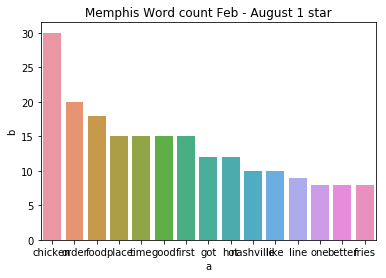

In [11]:
#Plot the top 15 highest 
sns.barplot( x = 'a', y = 'b', data = df[:15])
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)

fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.rcParams["figure.figsize"] = fig_size
font = {'family' : 'Verdana',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)
width = 0.5  

x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
labels = ['chicken',
'order',
'food',
'place',
'time',
'good',
'first',
'got',
'hot',
'nashville',
'like',
'line',
'one',
'better',
'fries']
plt.xticks(x, labels, rotation='horizontal')
plt.title('Memphis Word count Feb - August 1 star')
plt.show()